In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv("us_admission.csv")
df

,Sno,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [12]:
X = df[['Gre','Toefl','Cgpa']]
X

,Gre,Toefl,Cgpa
0,337,118,9.65
1,324,107,8.87
2,316,104,8.00
3,322,110,8.67
4,314,103,8.21
...,...,...,...
495,332,108,9.02
496,337,117,9.87
497,330,120,9.56
498,312,103,8.43


In [15]:
y = df['Chance']*100
type(y)

pandas.core.series.Series

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=4)

In [55]:
X_train.shape,

((400, 3),)

In [69]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.818256725674439

In [70]:
model.coef_

array([ 0.20998802,  0.35689342, 14.52983338])

<AxesSubplot:>

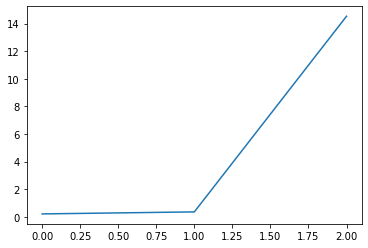

In [73]:
sns.lineplot(data = model.coef_)

In [74]:
model.score(X_train,y_train)

0.818256725674439

In [75]:
predication = model.predict(X_test)

In [82]:
actual_prediction = pd.DataFrame({'Actual':y_test,
                                 'Predicted':predication})

In [83]:
actual_prediction

,Actual,Predicted
66,61.0,83.392588
152,86.0,82.000067
123,61.0,65.637589
285,93.0,88.433487
70,94.0,94.878599
...,...,...
13,62.0,62.587931
166,65.0,63.834582
275,78.0,80.043285
92,34.0,57.208106


array([[<AxesSubplot:title={'center':'Actual'}>,
        <AxesSubplot:title={'center':'Predicted'}>]], dtype=object)

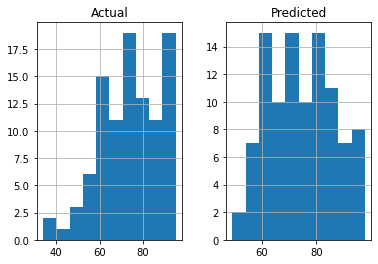

In [87]:
actual_prediction.hist()

In [88]:
actual_prediction.describe()

,Actual,Predicted
count,100.000000,100.000000
mean,73.880000,74.546256
std,13.641351,11.875528
min,34.000000,49.387557
25%,63.000000,64.448770
50%,74.000000,74.659507
75%,84.250000,83.342866
max,95.000000,97.577198


<AxesSubplot:>

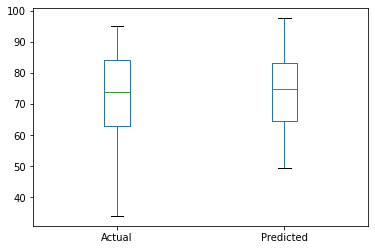

In [96]:
actual_prediction.plot.box()

In [97]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [98]:
r2_score(y_test,predication)

0.7398936808298944

In [99]:
mean_squared_error(y_test,predication)

47.91824271290421

In [100]:
mean_absolute_error(y_test,predication)

4.865750846944852

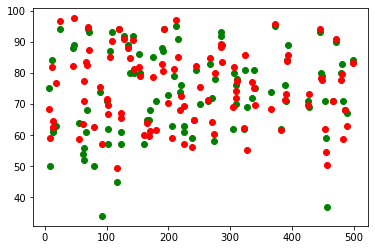

In [104]:
plt.scatter(actual_prediction.Actual.index,actual_prediction.Actual,color='Green')
plt.scatter(actual_prediction.Predicted.index,actual_prediction.Predicted,color='red')

In [105]:
X2 = df[['Gre','Toefl','Cgpa','Rating',
        'Sop','Lor','Research']]
y2 = df.Chance*100

In [124]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.20,
                          random_state=4)

In [125]:
allfeaturemodel = LinearRegression()

In [126]:
allfeaturemodel.fit(X2_train,y2_train)
allfeaturemodel.score(X2_train,y2_train)

0.8312506179456318

In [113]:
allfeaturemodel.score(X2_train,y2_train)

0.8215099192361265

In [131]:
predication2 =  allfeaturemodel.predict(X2_test)
r2_score(predication2,y2_test)

0.7142113765622744

In [129]:
actual_prediction2 = pd.DataFrame({'Actual':y2_test,
                                 'Predicted':predication2})

<AxesSubplot:>

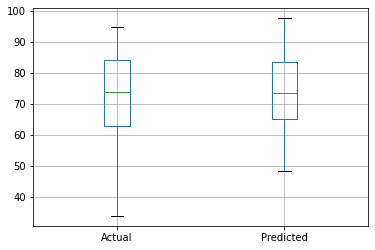

In [130]:
actual_prediction2.boxplot()

In [132]:
mean_squared_error(predication2,y2_test)

42.07098487857236

In [133]:
mean_absolute_error(predication2,y2_test)

4.536264727443213

In [134]:
from sklearn.tree import DecisionTreeRegressor

In [136]:
model = DecisionTreeRegressor()

In [139]:
model.fit(X_train,y_train)
model.score(X_train,y_train)

1.0

In [142]:
regPredict = model.predict(X_test) 
r2_score(y_test,regPredict)

0.5577132204443064